# **Linear Regression**

A classic problem is the *linear regression problem*:<br>
Given a collection of points in $\mathbb{R}^2$
$$D =\{(x_1,t_1),\ldots, (x_N,t_N)\}\;,$$
find the line
$$y=wx+b$$
that "best fits" $D$.   

**Terminology:**
In the context of machine learning we say that
- $D$ is the **data set**, which we'll soon split into **training data** and **validation data**  (and sometimes split even further), the $x_i$ are the **inputs** and the $t_i$ are the **labels** or **targets**.
- $y=f(x;w,b)=wx+b$, is the **model**.
- $\theta=(w,b)$ are the (learning) **parameters**; $w$ is the **weight** and $b$ the **bias**.   

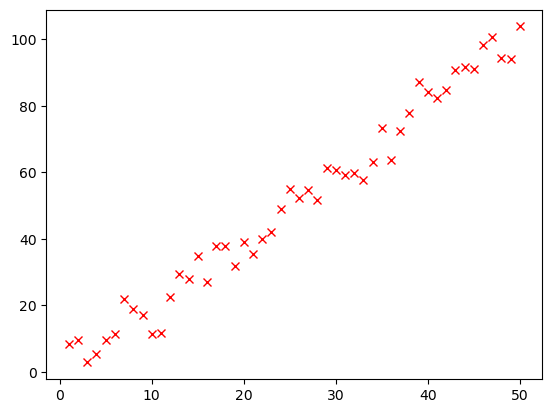

In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
X = np.arange(1,N+1)
Y = 2*X-1 + np.random.normal(0,5,(N,))

plt.plot(X,Y,'rx')

To turn the intuitive idea of "best fit" into something (mathematically) concrete we need a way to measure how close the **model predictions**
$$y_i = f(x_i;w,b)=wx_i+b$$
are to the labels $t_i$.

This is achieved by a **loss function**.

For this problem we will use the **mean square Loss**  function, defined by
$$L(w,b) = \frac{1}{N}\sum_{i=1}^N (y_i-t_i)^2\;.$$


It is important to stress that different problems will demand distinct loss functions.

| Loss Function | Problem Type |
| :--- | :--- |
| **Mean Squared Error (MSE)** | Regression |
| **Mean Absolute Error (MAE)** | Regression |
| **Huber Loss** | Regression |
| **Binary Cross-Entropy** | Binary Classification |
| **Categorical Cross-Entropy** | Multiclass Classification |
| **Sparse Categorical Cross-Entropy** | Multiclass Classification |
| **Hinge Loss** | Classification (SVM) |
| **Kullback-Leibler (KL) Divergence** | Probabilistic / Generative |

In [ ]:
def Loss(X,T,w,b): #MSE
  N = X.shape[0] 
  Y = w*X+b 
  Loss = np.matmul((Y-T).T,Y-T)/N 
  return Loss 

In this context **learning means optmize/minimize** the loss function.

Most problems in deep learning, it isn't feasible to find an exact solution, so  we'll have to settle with finding a "good enough" approximation of the optimal parameters.
A general framework to finding approximate (local) minima in the context of differentiable optimization is provided by **gradient descent**.

> **Gradient Descent:** Given an initial guess (a seed) $\theta_0$ and a *learning rate* $\eta>0$, consider the sequence defined by
$$\theta_{n+1} = \theta_n - \eta \nabla_{\theta} L(\theta_n)\;.$$

Under appropriate conditions it can be shown that the previous sequence converges to a local minimum of the loss function $L$.

To implement gradient descent in the context of the previous linear regression
problem we need to compute
$$\nabla_{\theta} L = \left(\frac{\partial L}{\partial w},\frac{\partial L}{\partial b}\right).$$

In [5]:
# Gradient of the Loss function

def grad(X,T,w,b):
  dLdw = 2*(w*np.mean(np.square(X)) + b*np.mean(X) - np.mean(X*T))
  dLdb = 2*(w*np.mean(X)-np.mean(T)+b)
  return dLdw , dLdb

## Parameter initialization:

Since we need an initialization procedure, let us simply use the following standard (partially) random initializaton prescribed by:

$$w\sim {\cal N}(0,1) \quad\quad \text{ and } \quad\quad b=0\;,$$

where ${\cal N}(0,1)$ denotes the Normal distribution with zero mean and unit standard deviation.  

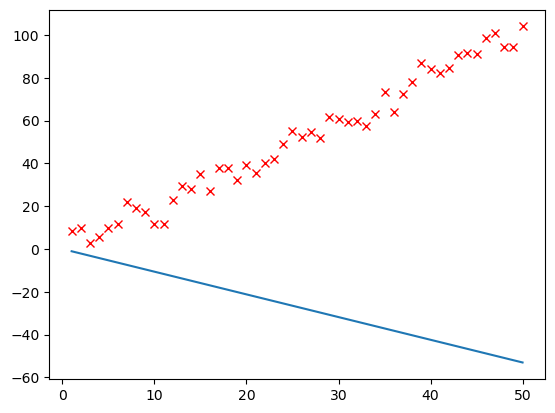

In [37]:

w = np.random.normal(0,1)
b = 0

def my_plot(X,Y,w,b):
  xx = np.arange(X[0],X[-1]+.1,.1)
  yy = w*xx + b
  plt.plot(X,Y,'rx')
  plt.plot(xx,yy)

my_plot(X,Y,w,b)

We have everything we need to implement a full training loop and compute approximate solutions to the problem at hand.

20.77975504023699
20.770964619322953
20.76298656195008
20.75574579383814
20.749174178669133
20.74320987691798
20.737796763936807
20.73288390181655
20.72842506005644
20.724378280530576
20.720705482657937
20.71737210506049
20.71434678033737
20.711601039894603
20.70910904605294
20.70684734891283
20.704794665688627
20.702931680435572
20.70124086228488
20.69970630047661
20.698313554637892
20.697049518897646
20.695902298559098
20.69486109816951
20.693916119934
20.693058471517293
20.69228008236606
20.691573627764228
20.69093245990662
20.690350545342618
20.6898224082007
20.689343078660045
20.688908046183993
20.68851321707546
20.688154875954925
20.687829650798285
20.687534481205816
20.687266589603528
20.68702345510592
20.686802789794182
20.68660251718671
20.68642075269919
20.68625578591044
20.686106064467285
20.685970179476666
20.685846852247877
20.68573492225993
20.685633336240972
20.68554113825689
20.685457460715867
20.685381516204252
20.685312590076983
20.6852500337326
20.685193258509965
20.

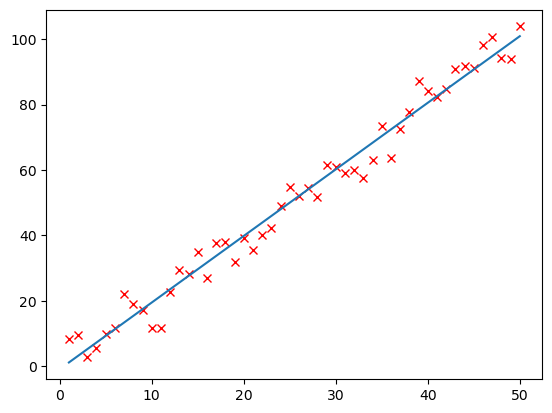

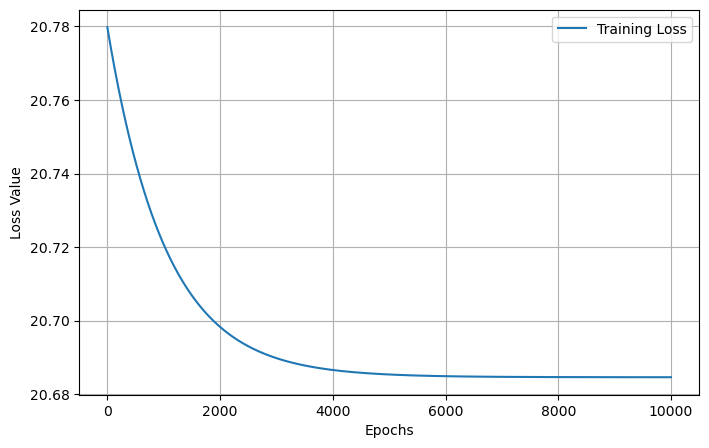

In [39]:
num_epochs = 10000

def model_fit(X,T,w,b,num_epochs,lr=1e-3):
  loss_history = []
  for epoch in range(num_epochs):
    dLdw, dLdb = grad(X,T,w,b)
    w -= lr*dLdw
    b -= lr*dLdb # update parameters( - because we want to go down the gradient)
    loss_history.append(Loss(X,T,w,b))
    if epoch % 100 == 0:
      print(Loss(X,T,w,b))
  return w, b, loss_history

w, b, history = model_fit(X,Y,w,b,num_epochs)

print(f"final Loss = {Loss(X,Y,w,b)}")
print(f"final grad = {grad(X,Y,w,b)}")
my_plot(X,Y,w,b)


plt.figure(figsize=(8, 5))
plt.plot(history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.show()
